In this notebook, we will be exploring the book "History of France" written by Charlotte M. Yonge. The book is freely available in the website https://www.gutenberg.org/. We will first scrape the text data of the interested book from the website. Then, we will process the data to obtain the following insights:

01. What is the most frequently used word in the book?
02. Can I look at the summary of the book?

Let us see!

In [1]:
import requests
import nltk
from bs4 import BeautifulSoup

Now let us obtain the required corpus from the webiste by requesting.

In [2]:
r = requests.get('https://www.gutenberg.org/files/17287/17287-0.txt')
r.encoding='utf-8'
html=r.text
print(html[:4000])

﻿The Project Gutenberg EBook of History of France, by Charlotte M. Yonge

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: History of France

Author: Charlotte M. Yonge

Editor: J.R. Green

Release Date: December 12, 2005 [EBook #17287]

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK HISTORY OF FRANCE ***




Produced by Marilynda Fraser-Cunliffe, Taavi Kalju and the
Online Distributed Proofreaders Europe at
http://dp.rastko.net.





History Primers. _Edited by_ J.R. GREEN.




HISTORY OF FRANCE.

BY

CHARLOTTE M. YONGE.


NEW YORK:
D. APPLETON AND COMPANY
1, 3, AND 5 BOND STREET.
1882.




CONTENTS.


                                     PAGE

CHAPTER I.

THE EARLIER KINGS OF FRANCE             1


CHAPTER II.

THE HUNDRED YEARS' WAR 

Now let us obtain the text by using Beautiful Soup package.

In [3]:
soup = BeautifulSoup(html, 'html.parser')
text=soup.get_text()
print(text[:3000])

﻿The Project Gutenberg EBook of History of France, by Charlotte M. Yonge

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: History of France

Author: Charlotte M. Yonge

Editor: J.R. Green

Release Date: December 12, 2005 [EBook #17287]

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK HISTORY OF FRANCE ***




Produced by Marilynda Fraser-Cunliffe, Taavi Kalju and the
Online Distributed Proofreaders Europe at
http://dp.rastko.net.





History Primers. _Edited by_ J.R. GREEN.




HISTORY OF FRANCE.

BY

CHARLOTTE M. YONGE.


NEW YORK:
D. APPLETON AND COMPANY
1, 3, AND 5 BOND STREET.
1882.




CONTENTS.


                                     PAGE

CHAPTER I.

THE EARLIER KINGS OF FRANCE             1


CHAPTER II.

THE HUNDRED YEARS' WAR 

Now, it is time to tokenize the text for easier text processing. We use nltk package to do tokenizing

In [7]:
tokenizer=nltk.tokenize.RegexpTokenizer('\w+')

tokens=tokenizer.tokenize(text)

print(tokens[:10])

['The', 'Project', 'Gutenberg', 'EBook', 'of', 'History', 'of', 'France', 'by', 'Charlotte']


So, let us avoid repitition of words as this process is case sensitive. We will convert all the words into lower case.

In [8]:
words=[]

for token in tokens:
    words.append(token.lower())
    
print(words[:10])

['the', 'project', 'gutenberg', 'ebook', 'of', 'history', 'of', 'france', 'by', 'charlotte']


OK. We can find some of the words are often repaeated but they posses no meaning and value to the context of the text. 

In [10]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

In [11]:
words_clean=[]

for word in words:
    if word not in stop:
        words_clean.append(word)
        
print(words_clean[:10])

['project', 'gutenberg', 'ebook', 'history', 'france', 'charlotte', 'yonge', 'ebook', 'use', 'anyone']


Yeah. Finally let us plot the words versus its frequency of its usgae in the corpus.

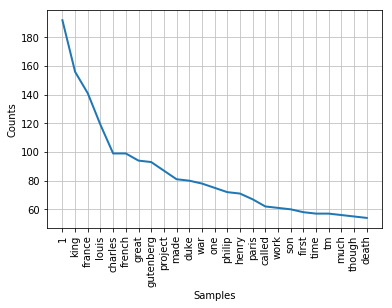

In [12]:
%matplotlib inline

freqdist = nltk.FreqDist(words_clean)

freqdist.plot(25)

Wow France is used almost 140 times in the book History of France and it is the third most used word in the book.